In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
covid_original = pd.read_csv("owid-covid-data.csv")

In [4]:
covid_world = covid_original.copy()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [6]:
covid_world.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


### Data Cleasning

In [7]:
covid_world["date"] = pd.to_datetime(covid_world["date"],format="%Y-%m-%d")

In [8]:
covid_world = covid_world.drop(["iso_code"],axis =1)
covid_world = covid_world.drop(["continent"],axis =1)

In [9]:
covid_world = covid_world.fillna(0)

In [10]:
covid_world = covid_world.set_index("location")

### build training data (Germany / Italy/ USA)

In [11]:
covid_germany = covid_world.loc[(covid_world.index =="Germany")&(covid_world["total_cases"]>=30),["date","total_cases"]]

In [12]:
covid_italy = covid_world.loc[(covid_world.index =="Italy")&(covid_world["total_cases"]>=30),["date","total_cases"]]

In [13]:
covid_usa = covid_world.loc[(covid_world.index =="United States")&(covid_world["total_cases"]>=30),["date","total_cases"]]

In [14]:
country_list = ["covid_germany","covid_italy","covid_usa"]

In [15]:
covid_world.loc[(covid_world.index =="Italy")&(covid_world["total_cases"]>=30),:]

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
location,,,,,,,,,,,,,,,,,,,,,
Italy,2020-02-23,79,62,2,2,1.307,1.025,0.033,0.033,0.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-24,132,53,2,0,2.183,0.877,0.033,0.000,4324.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-25,229,97,6,4,3.788,1.604,0.099,0.066,8623.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-26,322,93,11,5,5.326,1.538,0.182,0.083,9587.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-27,400,78,12,1,6.616,1.290,0.198,0.017,12014.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-28,650,250,17,5,10.751,4.135,0.281,0.083,15695.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-02-29,888,238,21,4,14.687,3.936,0.347,0.066,18661.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-03-01,1128,240,29,8,18.656,3.969,0.480,0.132,21127.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
Italy,2020-03-02,1689,561,35,6,27.935,9.279,0.579,0.099,23345.0,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


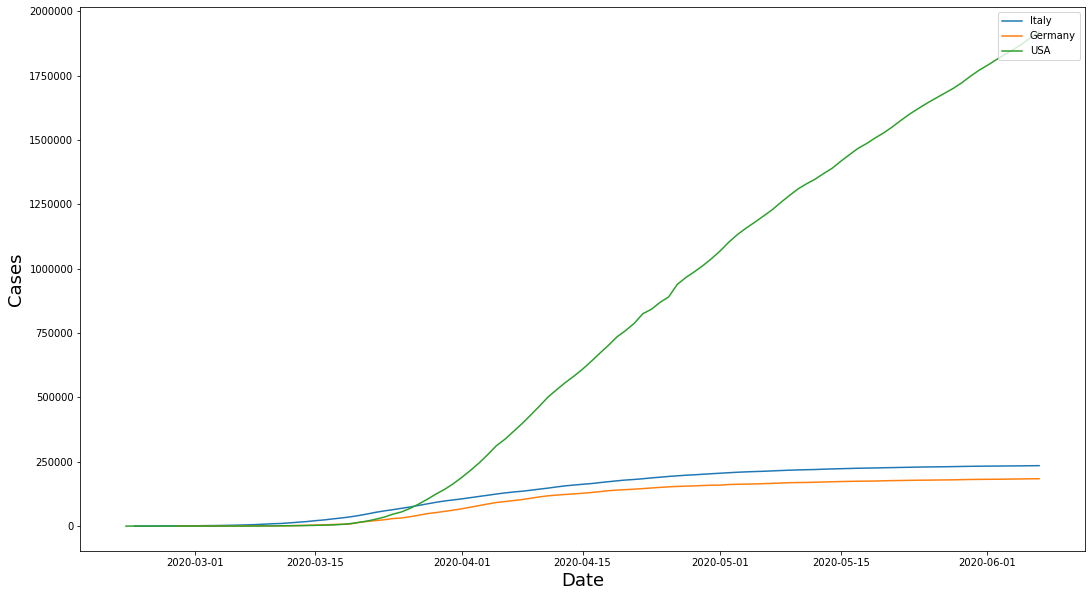

In [16]:
plt.figure(figsize = (18,10))
plt.plot(covid_italy["date"],covid_italy["total_cases"], label = "Italy")
plt.plot(covid_germany["date"],covid_germany["total_cases"], label = "Germany")
plt.plot(covid_usa["date"],covid_usa["total_cases"], label = "USA")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cases',fontsize=18)
plt.legend(loc='upper right')

In [17]:
total_case = covid_world["total_cases"]

In [18]:
world = covid_world.copy()

In [19]:
total_case = world.pop("total_cases")

In [20]:
covid_usa_case = covid_usa.pop("total_cases")

In [21]:
len(covid_usa_case)

107

In [22]:
train_data = covid_usa_case